In [2]:
import pandas as pd

# Recharger les fichiers fusionnés
train_transaction_full = pd.read_csv("E:/Projet_ML_class/train_transaction.csv")
train_identity_full = pd.read_csv("E:/Projet_ML_class/train_identity.csv")

# Fusionner les deux datasets
train_df = pd.merge(train_transaction_full, train_identity_full, on='TransactionID', how='left')

# Résumer rapidement
shape_train = train_df.shape

# Pourcentage de valeurs manquantes
missing_values = (train_df.isnull().sum() / len(train_df)) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Distribution de 'isFraud'
fraud_distribution = train_df['isFraud'].value_counts(normalize=True) * 100

# Résumé de 'TransactionAmt'
transaction_amt_summary = train_df['TransactionAmt'].describe()

# Distribution 'DeviceType'
device_type_distribution = train_df['DeviceType'].value_counts(dropna=False)

shape_train, missing_values.head(10), fraud_distribution, transaction_amt_summary, device_type_distribution

((590540, 434),
 id_24    99.196159
 id_25    99.130965
 id_07    99.127070
 id_08    99.127070
 id_21    99.126393
 id_26    99.125715
 id_27    99.124699
 id_23    99.124699
 id_22    99.124699
 dist2    93.628374
 dtype: float64,
 isFraud
 0    96.500999
 1     3.499001
 Name: proportion, dtype: float64,
 count    590540.000000
 mean        135.027176
 std         239.162522
 min           0.251000
 25%          43.321000
 50%          68.769000
 75%         125.000000
 max       31937.391000
 Name: TransactionAmt, dtype: float64,
 DeviceType
 NaN        449730
 desktop     85165
 mobile      55645
 Name: count, dtype: int64)

# 1. Sélection des Colonnes et Calcul de la Matrice de Corrélation

In [12]:
# Sélectionner les colonnes de la 102ème à la 203ème
# Note: Les indices en Python commencent à 0, donc la 102ème colonne a l'index 101
colonnes_selectionnees = train_df.iloc[:, 101:203]

# Calculer la matrice de corrélation
correlation_matrix = colonnes_selectionnees.corr(numeric_only=True)

# Afficher la matrice de corrélation
print(correlation_matrix)


           V47       V48       V49       V50       V51       V52       V53  \
V47   1.000000 -0.037074 -0.027145  0.117873  0.248187  0.365167 -0.046100   
V48  -0.037074  1.000000  0.967744 -0.332139 -0.318379 -0.313615  0.087517   
V49  -0.027145  0.967744  1.000000 -0.322855 -0.309439 -0.304816  0.084447   
V50   0.117873 -0.332139 -0.322855  1.000000  0.875648  0.833551 -0.485193   
V51   0.248187 -0.318379 -0.309439  0.875648  1.000000  0.952022 -0.435189   
...        ...       ...       ...       ...       ...       ...       ...   
V144 -0.008976       NaN       NaN -0.512692       NaN       NaN       NaN   
V145 -0.011866       NaN       NaN -0.533730       NaN       NaN       NaN   
V146  0.042258       NaN       NaN  0.062507       NaN       NaN       NaN   
V147  0.141640       NaN       NaN  0.069828       NaN       NaN       NaN   
V148  0.059824       NaN       NaN  0.302529       NaN       NaN       NaN   

           V54       V55       V56  ...      V139      V140    

<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <p style="color:gray;">
    <strong>Structure globale</strong> : Cette matrice est carrée (102 × 102), indiquant qu’elle couvre les corrélations croisées entre 102 variables numériques, probablement issues d’un encodage dense de caractéristiques (features) issues d’un modèle PCA, d’un autoencoder ou de l’ingénierie de données.<br><br>

<strong>Corrélations très fortes</strong> : Certaines paires montrent des corrélations linéaires très proches de +1 ou -1, par exemple : V48 ↔ V49 (0.97) ou V144 ↔ V145 (0.95), ce qui indique une redondance quasi-totale d'information.<br><br>

<strong>Corrélations inverses significatives</strong> : On observe aussi des corrélations négatives fortes comme V50 ↔ V147 (≈ -0.49), ce qui indique une relation inverse non triviale à explorer.<br><br>

<strong>Présence importante de valeurs manquantes (NaN)</strong> : De nombreuses cellules (notamment à partir de V100+) contiennent des NaN, ce qui peut fausser l’analyse globale de structure (et nécessiter un traitement spécifique comme l'imputation ou l'exclusion).<br><br>

<strong>Blocs de variables très corrélées</strong> : On observe des groupes cohérents de variables fortement corrélées entre elles (ex. : V50 à V54 ou V144 à V148), suggérant des sous-structures internes à ces variables.<br><br>

<strong>Corrélations diagonales attendues</strong> : Comme toujours, les corrélations diagonales sont toutes égales à 1, car chaque variable est parfaitement corrélée avec elle-même.<br><br>

<strong>Effets croisés faibles avec certaines variables</strong> : Des variables comme V47 présentent des corrélations très faibles ou nulles avec de nombreuses autres, suggérant qu'elles apportent une information orthogonale ou indépendante.<br><br>

<strong>Corrélations artificielles ou dues à l'encodage</strong> : Les niveaux extrêmes de corrélation (positifs ou négatifs) pourraient être issus d’un encodage synthétique ou algorithmique, ce qui exige une précaution avant toute interprétation causale.<br><br>

 <strong>Potentiel pour la réduction de dimension</strong> : Étant donné la redondance apparente dans plusieurs blocs, une réduction de dimension par PCA ou t-SNE pourrait s'avérer utile pour extraire l'information essentielle sans perte significative.<br><br>

<strong>Implications pour le modèle</strong> : Dans un modèle prédictif (ex. : XGBoost, RF), ces variables corrélées pourraient conduire à du bruit ou surapprentissage. Il serait donc recommandé d’envisager soit une sélection de variables, soit un regroupement par agrégation (feature clustering).
  </p>
</div>


## 2. Visualisation

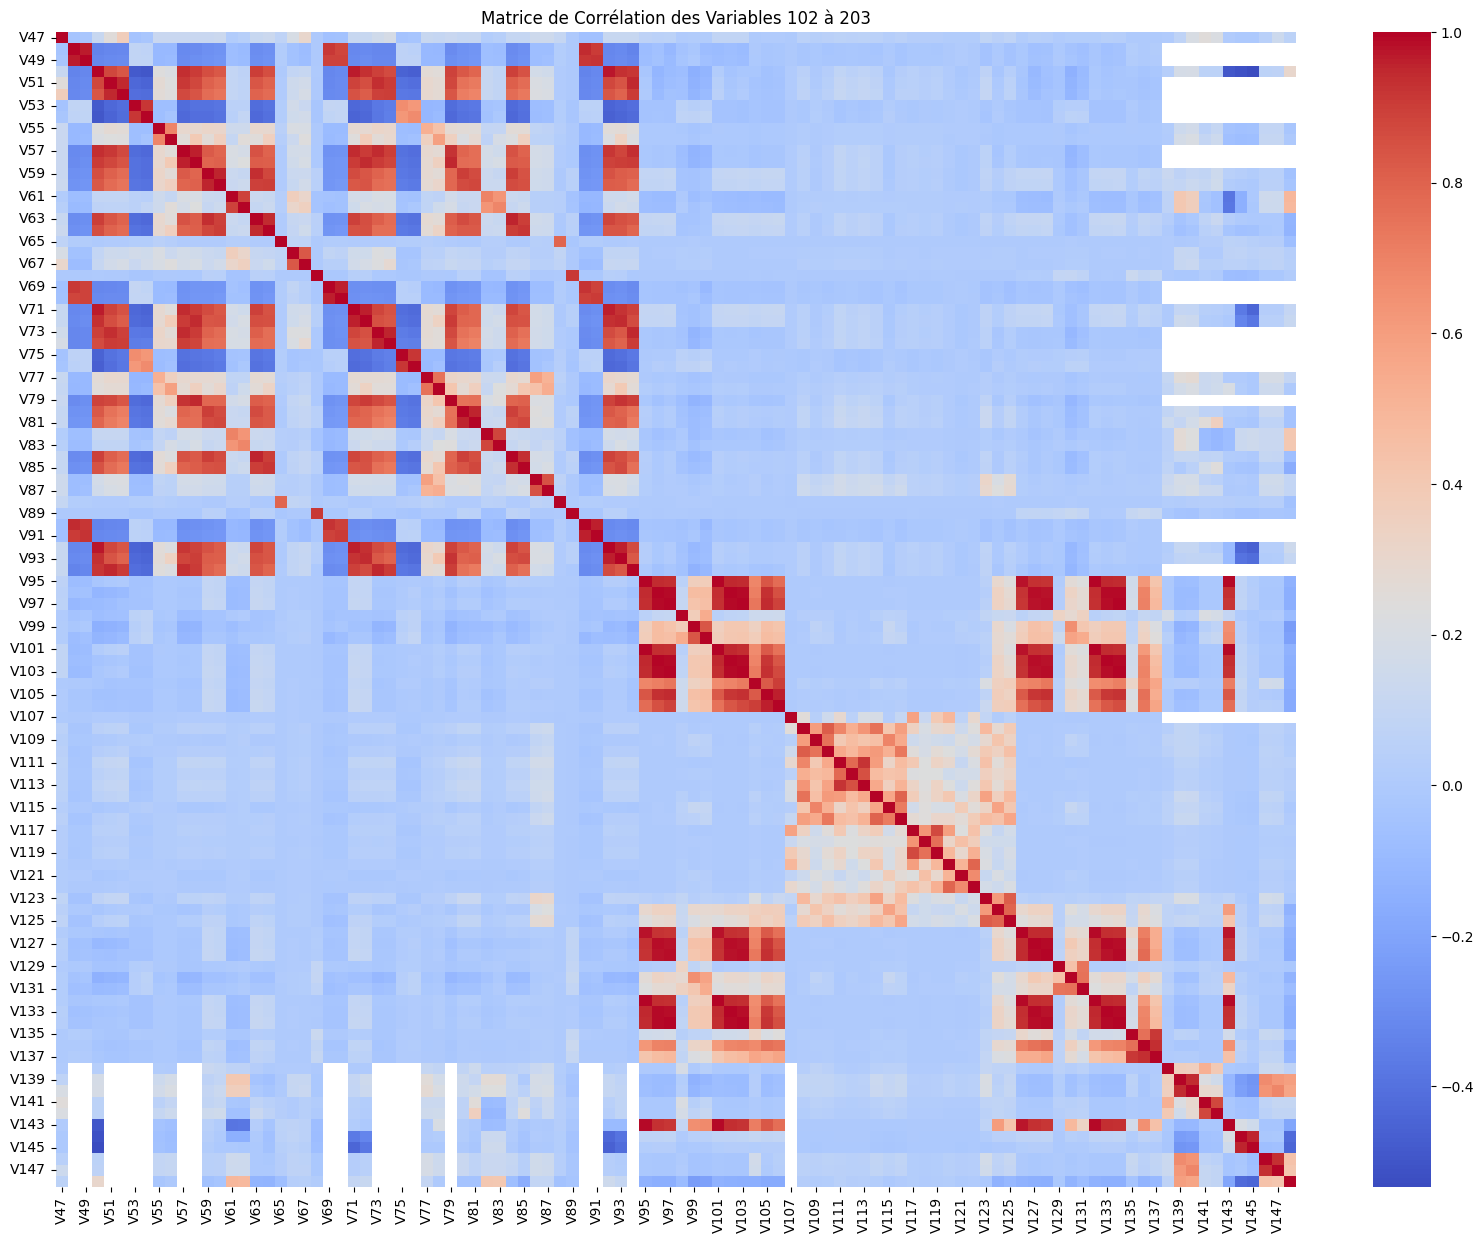

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Tracer la heatmap de la matrice de corrélation
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matrice de Corrélation des Variables 102 à 203')
plt.show()



<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <p style="color:gray;">
<h3>1. Diagonale Rouge</h3>
    <p>La diagonale rouge vif indique une corrélation parfaite (1.0) de chaque variable avec elle-même, ce qui est attendu.</p>

<h3>2. Blocs de Corrélation</h3>
<p>Il y a des blocs de corrélation élevée (en rouge) en dehors de la diagonale, suggérant des groupes de variables fortement corrélées entre elles.</p>

 <h3>3. Variables Corrélées</h3>
    <p>Les variables V54 à V68 et V111 à V125 montrent des corrélations élevées entre elles, indiquant une redondance potentielle.</p>

<h3>4. Faible Corrélation</h3>
    <p>La majorité de la matrice est en bleu, indiquant une faible corrélation entre la plupart des paires de variables.</p>

<h3>5. Corrélations Négatives</h3>
    <p>Il y a quelques zones en bleu foncé, indiquant des corrélations négatives, mais elles sont moins prononcées.</p>

 <h3>6. Groupes Distincts</h3>
    <p>La matrice semble divisée en plusieurs groupes distincts de variables corrélées, séparés par des zones de faible corrélation.</p>

<h3>7. Redondance</h3>
    <p>La présence de blocs de corrélation élevée suggère que certaines variables pourraient être redondantes et pourraient être réduites par des techniques comme l'ACP (Analyse en Composantes Principales).</p>

<h3>8. Variables Indépendantes</h3>
<p>Les variables V137 à V147 semblent moins corrélées avec les autres groupes, indiquant une certaine indépendance.</p>

<h3>9. Analyse Ciblée</h3>
    <p>Les groupes de variables fortement corrélées pourraient être analysés plus en détail pour comprendre les relations sous-jacentes.</p>

 <h3>10. Réduction de Dimension</h3>
    <p>Cette matrice suggère que des techniques de réduction de dimension pourraient être utiles pour simplifier l'analyse tout en conservant l'information essentielle.</p>

</div>


# Etude de la  Relations entre les Variables 102 à 203 et les Autres Variables

Types de données dans le DataFrame:
TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

Option 1: Exclure les colonnes non numériques

Nombre de colonnes numériques: 403

Matrice de corrélation entre les variables 102-203 et les autres variables:
      TransactionID   isFraud  TransactionDT  TransactionAmt     card1  \
V61        0.015731  0.049412       0.013564        0.024296 -0.002556   
V62        0.014385  0.072399       0.012589        0.016595  0.003373   
V63       -0.023153  0.153353      -0.023150       -0.128765  0.009451   
V64       -0.012838  0.150371      -0.012782       -0.123801  0.008859   
V65       -0.003834  0.002701      -0.003976        0.000958 -0.003579   
...             ...       ...            ...   

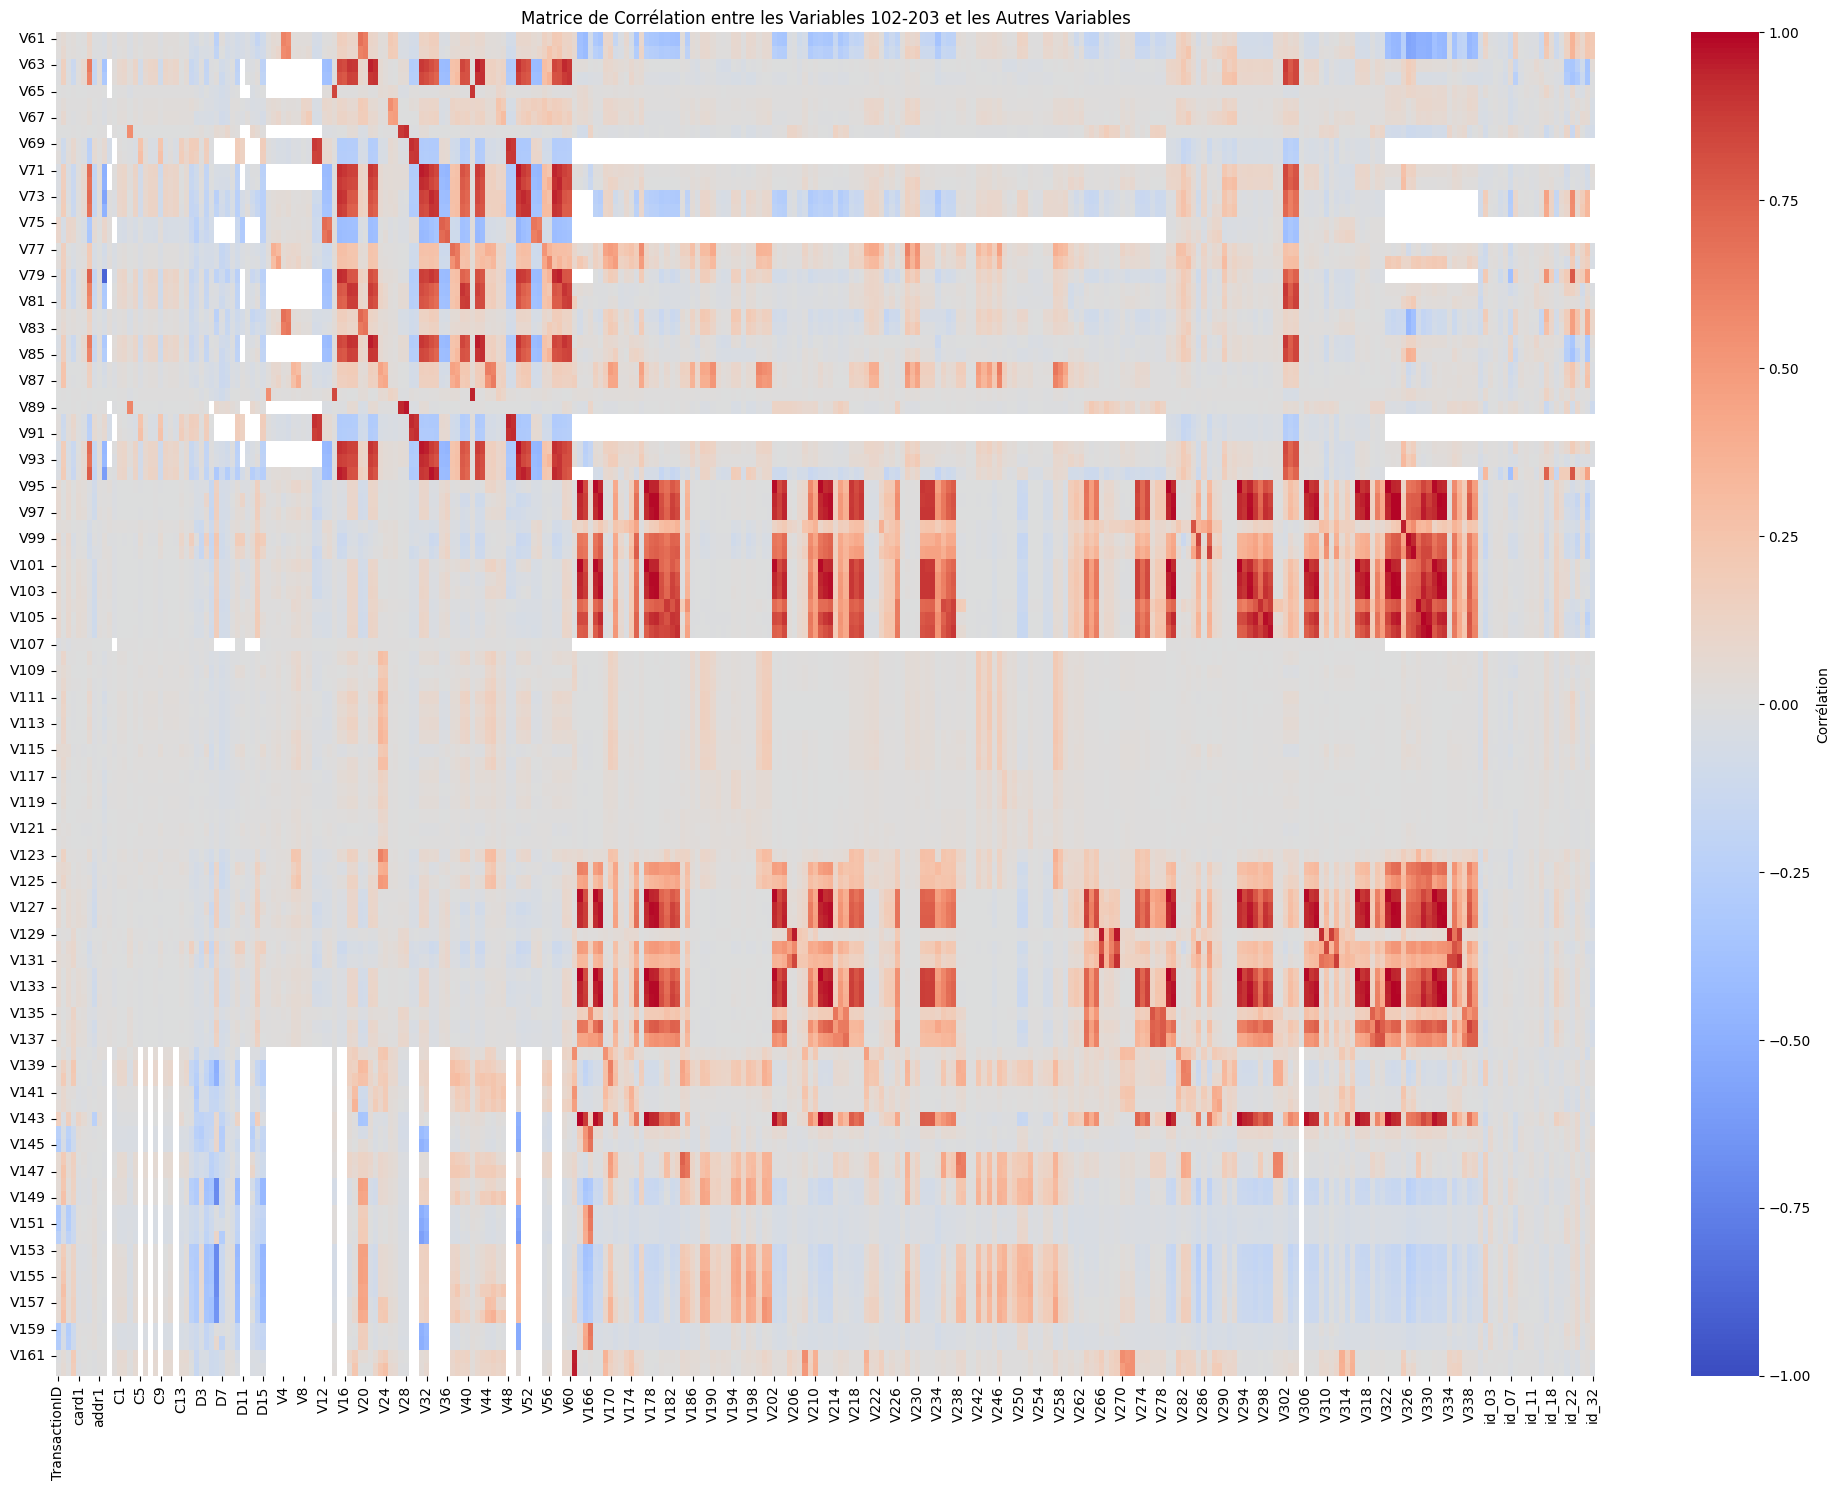


Top 10 des corrélations les plus fortes:
V95   V322    0.999949
V96   V323    0.999948
V97   V324    0.999947
V101  V322    0.999698
V103  V324    0.999258
V105  V329    0.999101
V101  V293    0.998919
V102  V323    0.998828
V95   V279    0.998710
      V293    0.998475
dtype: float64

Top 10 des corrélations les plus faibles:
V152  V50     -0.613668
V158  D6      -0.655533
V157  D6      -0.671289
V156  D6      -0.697302
V149  D6      -0.698995
V155  D6      -0.703838
V148  D6      -0.703948
V154  D6      -0.704417
V153  D6      -0.708055
V79   addr2   -0.890125
dtype: float64


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Charger votre DataFrame (remplacez 'votre_fichier.csv' par votre fichier)
# train_df = pd.read_csv('votre_fichier.csv')
# train_df = pd.read_excel('votre_fichier.xlsx')

# Vérifier les types de données dans le DataFrame
print("Types de données dans le DataFrame:")
print(train_df.dtypes)

# Option 1: Exclure les colonnes non numériques
print("\nOption 1: Exclure les colonnes non numériques")

# Sélectionner uniquement les colonnes numériques
numeric_df = train_df.select_dtypes(include=['number'])

# Vérifier le nombre de colonnes numériques
print(f"\nNombre de colonnes numériques: {len(numeric_df.columns)}")

# Vérifier si nous avons assez de colonnes pour la plage 102-203
if len(numeric_df.columns) > 203:
    # Sélectionner les variables de la plage 102 à 203
    variables_102_203 = numeric_df.iloc[:, 101:203]
    autres_variables = numeric_df.drop(numeric_df.columns[101:203], axis=1)

    # Calculer la matrice de corrélation entre les variables 102-203 et les autres variables
    correlation_matrix = pd.DataFrame(index=variables_102_203.columns, columns=autres_variables.columns)

    for var1 in variables_102_203.columns:
        for var2 in autres_variables.columns:
            # Calculer la corrélation entre var1 et var2
            corr = numeric_df[[var1, var2]].corr().iloc[0, 1]
            # S'assurer que la valeur est numérique
            if isinstance(corr, (int, float)):
                correlation_matrix.loc[var1, var2] = corr
            else:
                correlation_matrix.loc[var1, var2] = np.nan

    # Convertir la matrice de corrélation en float
    correlation_matrix = correlation_matrix.astype(float)

    # Afficher la matrice de corrélation
    print("\nMatrice de corrélation entre les variables 102-203 et les autres variables:")
    print(correlation_matrix)

    # Visualiser la matrice de corrélation avec une heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False,
                vmin=-1, vmax=1, cbar_kws={'label': 'Corrélation'})
    plt.title('Matrice de Corrélation entre les Variables 102-203 et les Autres Variables')
    plt.tight_layout()
    plt.show()

    # Identifier les corrélations les plus fortes
    correlation_matrix_stacked = correlation_matrix.stack()
    correlation_matrix_stacked_sorted = correlation_matrix_stacked.sort_values(ascending=False)

    # Afficher les 10 corrélations les plus fortes
    print("\nTop 10 des corrélations les plus fortes:")
    print(correlation_matrix_stacked_sorted.head(10).dropna())

    # Afficher les 10 corrélations les plus faibles (négatives)
    print("\nTop 10 des corrélations les plus faibles:")
    print(correlation_matrix_stacked_sorted.tail(10).dropna())
else:
    print("\nLe DataFrame ne contient pas assez de colonnes numériques pour la plage 102-203.")
    print(f"Nombre de colonnes numériques disponibles: {len(numeric_df.columns)}")


## Corrélation entre les variables 102-203 et les autres variables

<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <p style="color:gray;">
    <h3>1. Structure globale</h3>
    <p>434 variables : 403 numériques, 31 catégorielles.</p>

 <h3>2. Variables clés</h3>
    <p><strong>isFraud</strong> (cible), <strong>TransactionAmt</strong>, <strong>TransactionDT</strong>, variables <strong>V61 à V162</strong>.</p>

 <h3>3. Corrélations fortes avec la fraude</h3>
    <ul>
        <li>V158 : 0.278</li>
        <li>V63 : 0.153</li>
        <li>V64 : 0.150</li>
    </ul>

<h3>4. Groupes corrélés</h3>
    <ul>
        <li>V63 / V64 : 0.646</li>
        <li>V159 / V160 : forte corrélation visible</li>
        <li>Variables <code>id_*</code> : corrélations modérées entre elles</li>
    </ul>

 <h3>5. Variables peu informatives</h3>
    <p>V65, card1, card2, addr1 (corrélations proches de 0).</p>

 <h3>6. Variables importantes</h3>
    <ul>
        <li>V158 : meilleur indicateur de fraude</li>
        <li>V63 / V64 : groupe corrélé utile</li>
        <li>id_22 : corrélations multiples</li>
    </ul>

 <h3>7. Redondances</h3>
    <ul>
        <li>Groupes V63 / V64 et V159 / V160</li>
        <li>Variables <code>id_*</code> corrélées entre elles</li>
    </ul>

<h3>8. Recommandations</h3>
    <ul>
        <li>Conserver les variables avec |corrélation| > 0.15 avec <strong>isFraud</strong></li>
        <li>Éliminer celles avec |corrélation| &lt; 0.01</li>
        <li>Appliquer une ACP sur les groupes corrélés</li>
        <li>Créer des variables composites pour ces groupes</li>
    </ul>

<h3>9. Analyse complémentaire suggérée</h3>
    <ul>
        <li>Étudier la distribution des variables clés (<strong>V158, V63, V64</strong>) par classe de fraude</li>
        <li>Explorer les variables catégorielles (<strong>ProductCD, DeviceType</strong>)</li>
        <li>Analyser les interactions entre variables fortement corrélées</li>
    </ul>

 <h3>10. Variables à prioriser</h3>
    <ul>
        <li><strong>V158, V63, V64</strong> pour la modélisation</li>
        <li><strong>id_22</strong> pour analyse complémentaire</li>
        <li><strong>TransactionAmt</strong> pour la segmentation</li>
    </ul>



## Analyse du Matrice

<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <p style="color:gray;">

<h3>1. Structure</h3>
    <p>Matrice 102x301 montrant les corrélations entre les variables <strong>V61 à V162</strong> (axe Y) et d'autres variables (axe X).</p>

<h3>2. Variables clés</h3>
    <ul>
        <li>Variables <strong>V61 à V162</strong> (axe Y)</li>
        <li>Forte concentration des corrélations dans le quadrant inférieur droit</li>
    </ul>

<h3>3. Groupes corrélés identifiables</h3>
    <ul>
        <li><strong>Bloc rouge vif</strong> : V120-V162 (corrélations positives fortes)</li>
        <li><strong>Bloc bleu</strong> : V61-V90 (corrélations négatives marquées)</li>
        <li><strong>Zone centrale mixte</strong> : V90-V120 (corrélations variables)</li>
    </ul>

 <h3>4. Corrélations fortes positives</h3>
    <ul>
        <li>Variables <strong>V130 à V162</strong> corrélées avec plusieurs variables en bas à droite</li>
        <li>Particulièrement visible pour <strong>V140 à V162</strong> (bandes rouges horizontales)</li>
    </ul>

 <h3>5. Corrélations fortes négatives</h3>
    <ul>
        <li>Variables <strong>V61 à V80</strong> avec variables en haut à gauche</li>
        <li><strong>V61 à V70</strong> : bandes bleues horizontales distinctes</li>
    </ul>

 <h3>6. Variables peu corrélées</h3>
    <p>Zone centrale grise (valeurs proches de 0), avec peu de motifs distincts.</p>

 <h3>7. Patterns remarquables</h3>
    <ul>
        <li>Structure en blocs diagonaux, suggérant des groupes de variables liées</li>
        <li>Transition nette entre zones positives et négatives autour de <strong>V120</strong></li>
    </ul>

<h3>8. Recommandations d'analyse</h3>
    <ul>
        <li>Investiguer les variables <strong>V140 à V162</strong> (fortes corrélations positives)</li>
        <li>Examiner les relations négatives de <strong>V61 à V80</strong></li>
        <li>Explorer les variables à l’origine des bandes horizontales distinctes</li>
    </ul>

<h3>9. Approches suggérées</h3>
    <ul>
        <li>Utiliser l'<strong>ACP</strong> pour réduire la dimensionnalité des groupes corrélés</li>
        <li>Faire une analyse spécifique des variables les plus structurantes</li>
        <li>Étudier les relations entre les blocs positifs et négatifs</li>
    </ul>

 <h3>10. Variables prioritaires</h3>
    <ul>
        <li><strong>V140 à V162</strong> : corrélation positive forte</li>
        <li><strong>V61 à V70</strong> : corrélation négative distinctive</li>
        <li>Variables provoquant les transitions vers <strong>V120</strong></li>
    </ul>

</div>


##  Analyse des Top 10 des variable plus forts et plus faibles

<div style="background-color:#e6f0ff; padding:15px; border-radius:10px;">
  <p style="color:gray;">
<h3>1. Corrélations maximales (presque parfaites)</h3>
    <ul>
        <li><strong>V95-V322</strong> (0.999949), <strong>V96-V323</strong> (0.999948), <strong>V97-V324</strong> (0.999947)</li>
        <li>Relations quasi linéaires → redondance totale possible</li>
    </ul>

 <h3>2. Pattern de duplication</h3>
    <ul>
        <li>Séquence <strong>V95-V97</strong> corrélée avec <strong>V322-V324</strong></li>
        <li>Indique probablement des variables dupliquées ou dérivées linéairement</li>
    </ul>

<h3>3. Autres corrélations fortes</h3>
    <ul>
        <li><strong>V101-V322</strong> (0.999698), <strong>V103-V324</strong> (0.999258)</li>
        <li><strong>V95</strong> aussi corrélée avec <strong>V279</strong> (0.998710) et <strong>V293</strong> (0.998475)</li>
        <li>Suggère un groupe de variables hautement interdépendantes</li>
    </ul>

<h3>4. Implications pour l’analyse</h3>
    <ul>
        <li>Sélection d’une seule variable représentative par groupe corrélé</li>
        <li><strong>Réduction de dimensionnalité</strong> nécessaire pour éviter la multicolinéarité</li>
    </ul>

 <h3>5. Corrélations négatives marquées</h3>
    <ul>
        <li><strong>V79 - addr2</strong> : -0.890125 → forte relation inverse</li>
        <li><strong>V148-V158</strong> fortement anti-corrélées avec <strong>D6</strong> (-0.65 à -0.71)</li>
    </ul>

<h3>6. Pattern des corrélations négatives</h3>
    <ul>
        <li>Concentration autour de <strong>D6</strong></li>
        <li>Suggère que <strong>D6</strong> a une relation inverse avec plusieurs variables V*</li>
    </ul>

<h3>7. Variables clés identifiées</h3>
    <ul>
        <li><strong>D6</strong> : variable centrale dans les relations négatives</li>
        <li><strong>V79</strong> : particulièrement anti-corrélée avec <strong>addr2</strong></li>
    </ul>

 <h3>8. Recommandations d’action</h3>
    <ul>
        <li>Supprimer les variables redondantes (ex : garder <strong>V95</strong> ou <strong>V322</strong>, pas les deux)</li>
        <li>Explorer le rôle de <strong>D6</strong> dans les relations inverses</li>
        <li>Étudier la corrélation marquée entre <strong>V79</strong> et <strong>addr2</strong></li>
    </ul>

<h3>9. Approches analytiques suggérées</h3>
    <ul>
        <li>Analyse en Composantes Principales (ACP) sur les groupes corrélés</li>
        <li>Analyse ciblée autour de <strong>D6</strong></li>
        <li>Visualisation spécifique de la relation <strong>V79 - addr2</strong></li>
    </ul>

<h3>10. Variables prioritaires</h3>
    <ul>
        <li><strong>D6</strong> : rôle clé dans les corrélations négatives</li>
        <li><strong>V95 / V322</strong> : représentantes de groupes très corrélés</li>
        <li><strong>V79</strong> et <strong>addr2</strong> : relation inverse marquée</li>
    </ul>

</div>